In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
pos_rev_text = []
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/train/pos"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        pos_rev_text.append(fd.read())
pos_rev_train = pd.DataFrame(columns=['label','review'])
pos_rev_train['review'] = pos_rev_text.copy()
pos_rev_train['label'] = 1
pos_rev_train.head()

,label,review
0,1,Bromwell High is a cartoon comedy. It ran at t...
1,1,Homelessness (or Houselessness as George Carli...
2,1,Brilliant over-acting by Lesley Ann Warren. Be...
3,1,This is easily the most underrated film inn th...
4,1,This is not the typical Mel Brooks film. It wa...


In [10]:
neg_rev_text = []
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/train/pos"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        neg_rev_text.append(fd.read())
neg_rev_train = pd.DataFrame(columns=['label','review'])
neg_rev_train['review'] = neg_rev_text.copy()
neg_rev_train['label'] = 0
neg_rev_train.head()

,label,review
0,0,Bromwell High is a cartoon comedy. It ran at t...
1,0,Homelessness (or Houselessness as George Carli...
2,0,Brilliant over-acting by Lesley Ann Warren. Be...
3,0,This is easily the most underrated film inn th...
4,0,This is not the typical Mel Brooks film. It wa...


In [11]:
sup_train = pos_rev_train.append(neg_rev_train)
sup_train.reset_index().drop('index',axis=1)
sup_train = sup_train.sample(frac=1).reset_index(drop=True)
sup_train.head()

,label,review
0,1,Coming shortly before the imposition of a mora...
1,1,This project was originally conceived as the m...
2,0,"What can I say, it's a damn good movie. See it..."
3,1,I saw the long day's dying when it first came ...
4,0,Of course if you are reading my review you hav...


In [12]:
pos_rev_text = []
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/test/pos"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        pos_rev_text.append(fd.read())
pos_rev_test = pd.DataFrame(columns=['label','review'])
pos_rev_test['review'] = pos_rev_text.copy()
pos_rev_test['label'] = 1
pos_rev_test.head()

,label,review
0,1,I went and saw this movie last night after bei...
1,1,Actor turned director Bill Paxton follows up h...
2,1,As a recreational golfer with some knowledge o...
3,1,"I saw this film in a sneak preview, and it is ..."
4,1,Bill Paxton has taken the true story of the 19...


In [13]:
neg_rev_text = []
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/test/pos"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        neg_rev_text.append(fd.read())
neg_rev_test = pd.DataFrame(columns=['label','review'])
neg_rev_test['review'] = neg_rev_text.copy()
neg_rev_test['label'] = 0
neg_rev_test.head()

,label,review
0,0,I went and saw this movie last night after bei...
1,0,Actor turned director Bill Paxton follows up h...
2,0,As a recreational golfer with some knowledge o...
3,0,"I saw this film in a sneak preview, and it is ..."
4,0,Bill Paxton has taken the true story of the 19...


In [14]:
sup_test = pos_rev_test.append(neg_rev_test)
sup_test.reset_index().drop('index',axis=1)
sup_test = sup_test.sample(frac=1).reset_index(drop=True)
sup_test.head()

,label,review
0,0,WARNING: MAY contain some minor spoilers.<br /...
1,0,Fantastic documentary. A movie within a movie....
2,1,One of the best western movies ever made. Unfo...
3,1,I've seen Riverdance in person and nothing com...
4,1,The Ghost Walks is a nifty little mystery with...


In [16]:
#Overall reviews dataframe including train and test
sup = sup_train.merge(sup_test,how='outer')
sup.head()

,label,review
0,1,Coming shortly before the imposition of a mora...
1,1,This project was originally conceived as the m...
2,0,"What can I say, it's a damn good movie. See it..."
3,1,I saw the long day's dying when it first came ...
4,0,Of course if you are reading my review you hav...


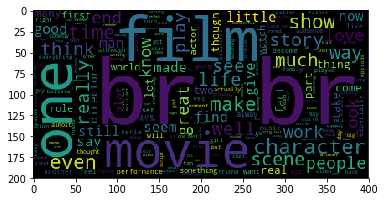

In [17]:
from wordcloud import WordCloud
wc = WordCloud()

review = sup['review'].unique().tolist()
review = ' '.join(review)
rev_cld = wc.generate(review)

plt.figure()
plt.imshow(rev_cld)
plt.show()

In [18]:
#Removing the HTML tags

sup_train.review=sup_train.review.str.replace('<br />','')
sup_test.review=sup_test.review.str.replace('<br />','')

In [19]:
#Applying Stemming

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Intel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
ps = PorterStemmer()
#Removing punctuations and stopwords
sup_train.review = sup_train.review.str.lower().str.replace('[^a-z]', ' ').str.split()
sup_train.review = sup_train.review.apply(lambda x : ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
sup_train.head()
#sup_train.to_csv('sup_train.csv',index=False)

,label,review
0,1,come shortli imposit moral code darken spirit ...
1,1,project origin conceiv movi version popular ja...
2,0,say damn good movi see still great camera work...
3,1,saw long day die first came cinema thought fil...
4,0,cours read review seen film alreadi raja babu ...


In [21]:
sup_test.review = sup_test.review.str.lower().str.replace('[^a-z]', ' ').str.split()
sup_test.review = sup_test.review.apply(lambda x : ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
sup_test.head()
#sup_test.to_csv('sup_test.csv',index=False)

,label,review
0,0,warn may contain minor spoiler hard say anyth ...
1,0,fantast documentari movi within movi glad bloc...
2,1,one best western movi ever made unfortun never...
3,1,seen riverd person noth compar video show awes...
4,1,ghost walk nifti littl mysteri great twist sna...


In [20]:
#Post cleaning
sup = sup_train.merge(sup_test,how='outer')

In [13]:
#Phase 2.2 Discover the lowest frequency and highest frequency(most common) words in review
from nltk.book import *
fdist = FreqDist(' '.join(sup.review).split())
print('Top 10 Highest freq words:',fdist.most_common(10))
print('\n')
print('Top 10 Lowest freq words:',fdist.most_common()[-10:-1])

Top 10 Highest freq words: [('film', 101696), ('movi', 89536), ('one', 56508), ('like', 41076), ('time', 33220), ('good', 30472), ('see', 30240), ('stori', 28344), ('charact', 28016), ('make', 27606)]


Top 10 Lowest freq words: [('etrang', 2), ('troob', 2), ('dogcatch', 2), ('bellushi', 2), ('darkwav', 2), ('hillin', 2), ('moviehunt', 2), ('listend', 2), ('absurdest', 2)]


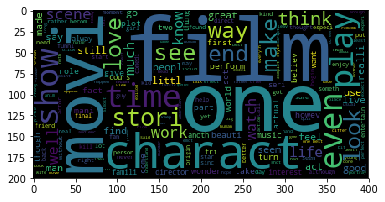

In [18]:
#Positive class wordcloud 
from wordcloud import WordCloud
wc = WordCloud()

review = sup[sup['label'] == 1].review.unique().tolist()
review = ' '.join(review)
rev_cld = wc.generate(review)

plt.figure()
plt.imshow(rev_cld)
plt.show()

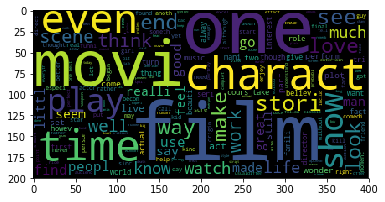

In [19]:
#Negative class wordcloud
from wordcloud import WordCloud
wc = WordCloud()

review = sup[sup['label'] == 0].review.unique().tolist()
review = ' '.join(review)
rev_cld = wc.generate(review)

plt.figure()
plt.imshow(rev_cld)
plt.show()

In [2]:
sup_train = pd.read_csv('sup_train.csv')
sup_test = pd.read_csv('sup_test.csv')

In [3]:
#Had to select slice of data due to memory error issues
sup = sup_train.merge(sup_test,how='outer')
sup = sup[:30000]

In [4]:
y = sup['label'].values
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X  = cv.fit_transform(sup.review).toarray()

In [5]:
#BOW
y_train = sup_train['label'].values
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train  = cv.fit_transform(sup_train.review).toarray()

In [6]:
y_test = sup_test['label'].values
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_test  = cv.fit_transform(sup_test.review).toarray()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
#tree_clf.fit(X_train, y_train)
tree_clf.fit(X, y)


importances = tree_clf.feature_importances_
feature_names = cv.get_feature_names()
feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=lambda x:x[1], reverse=True)

from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(tree_clf, prefit=True)
X_updated = model.transform(X)
#X_train_updated = model.transform(X_train)
#X_test_updated = model.transform(X_test)
print('Total train features count', X.shape[1])
print('Selected train features', X_updated.shape[1])
#print('Total test features count', X_test.shape[1])
#print('Selected test features', X_test_updated.shape[1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_updated,y_train)
lr_pred = logreg.predict(X_test_updated)

from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred)) 

0.3688173067759459

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_updated,y_train)
pred_rf = clf.predict(X_test_updated)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

0.30506051653483274

In [13]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_updated, y_train)
pred_nb = clf.predict(X_test_updated)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_nb))

0.4261888878299819

In [14]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_updated, y_train)
pred_svm = clf.predict(X_test_updated)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

0.4908033927380158

# Unsupervised

In [2]:
rev=[]
dir = "C:/Users/Intel/Desktop/New folder/aclImdb/train/unsup/"
for file in os.listdir( dir ):
    with open( os.path.join( dir, file ) ,"r",encoding="utf8") as fd:
        rev.append(fd.read())
unsup = pd.DataFrame(columns=['review'])
unsup['review'] = rev

In [3]:
unsup.review = unsup.review.str.replace('<br />','')
unsup.review = unsup.review.str.lower().str.replace('[^a-z]', ' ').str.split()

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps=PorterStemmer()
unsup.review = unsup.review.apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))
unsup.to_csv('unsup.csv',index=False)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [6]:
unsup.to_csv('unsup.csv',index=False)

In [20]:
unsup = pd.read_csv('unsup.csv')
unsup.head()

,review
0,admit great major film releas say dozen major ...
1,take low budget inexperienc actor doubl produc...
2,everybodi seen back futur right whether like m...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli fun love movi big year dori day yea...


In [35]:
#Had to choose slice of data due to memory error issues.
unsup_sample = unsup.sample(frac=1)[:20000]

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(use_idf=False,stop_words = 'english')
tfv.fit(unsup_sample.review)
X =  tfv.transform(unsup_sample.review) 

In [37]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000)
svd.fit(X)
X_updated = svd.transform(X)

In [38]:
# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X_updated)
X_updated_scl = scl.transform(X_updated)

Text(0.5,1,'KMeans Clusters')

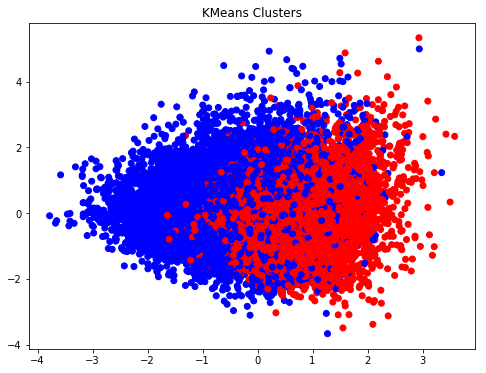

In [39]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2,random_state=0)
km.fit(X_updated_scl)

colors = ['red','blue']
pred_colors = [colors[label] for label in km.labels_]
plt.figure(figsize=(8,6)) 
plt.scatter(X_updated_scl[:,2],X_updated_scl[:,3], c=pred_colors)
plt.title('KMeans Clusters')

Text(0.5,1,'Hierarchical Clustering')

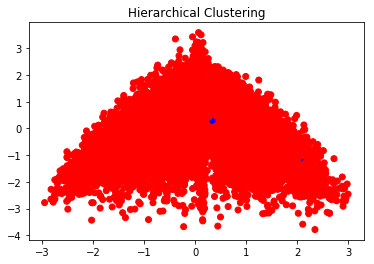

In [42]:
from sklearn.cluster import AgglomerativeClustering
ward=AgglomerativeClustering(n_clusters=2,linkage='ward')
ward.fit(X_updated_scl)
colors = ['red','blue']
pred_colors = [colors[label] for label in ward.labels_]
plt.scatter(X_updated_scl[:,1],X_updated_scl[:,2],c=pred_colors)
plt.title('Hierarchical Clustering')